In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 768
Number of Columns: 9


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The features 'glucose','blood pressure', 'insulin' and 'BMI' all have a minimum value of 0.This is illogical becuase these values can't be zero .Therefore ,in our circumstance,this can be safely referred to as 'missing data'. The 0 valued rows must either be removed or replaced with mean or median value for that feature.

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no null values

In [ ]:
df_cp.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [ ]:
# separating the data and labels
X = df_cp.drop(columns = 'Outcome', axis=1)
Y = df_cp['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [ ]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**Data Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data=scaler.transform(X)

In [ ]:
standardized_data

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [ ]:
X=standardized_data
Y=df_cp['Outcome']

In [ ]:
X

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [ ]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# **Handling Imbalanced data**

**Random** **Oversampling**

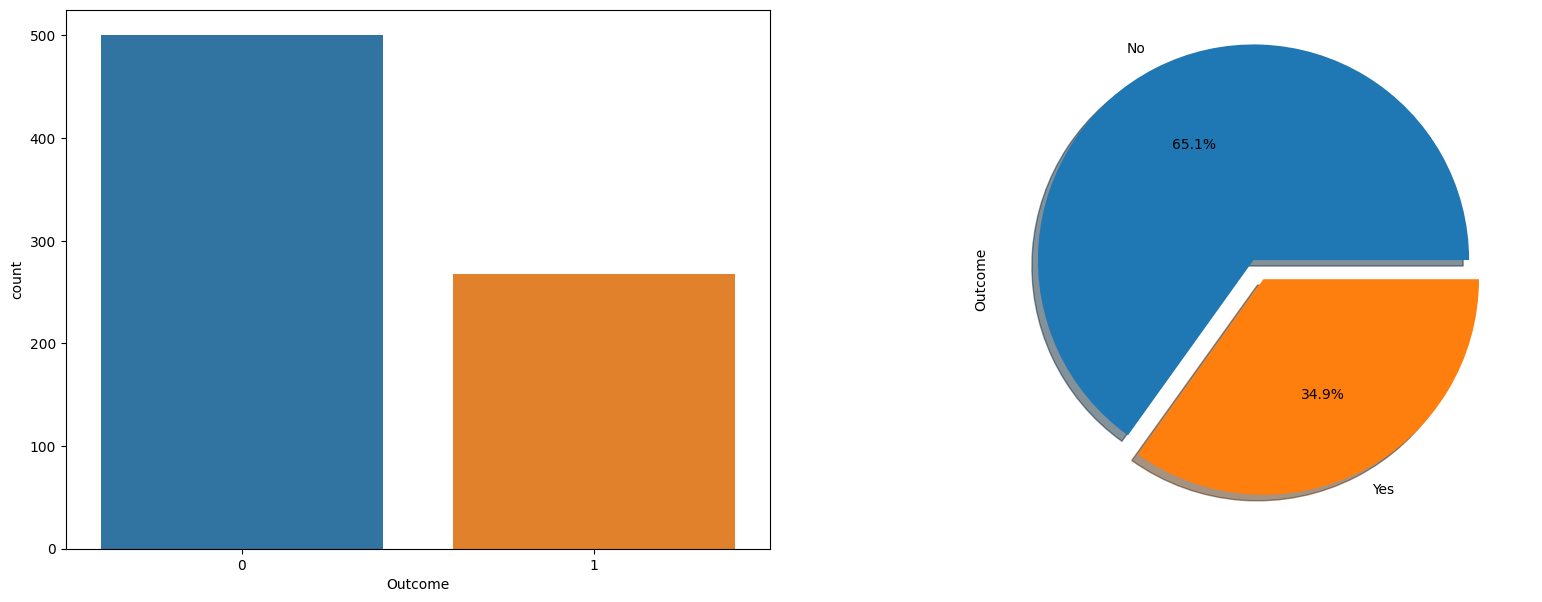

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=df_cp, x="Outcome", ax=ax[0])
df_cp["Outcome"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])

plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
XX , YY = ros.fit_resample(X,Y)

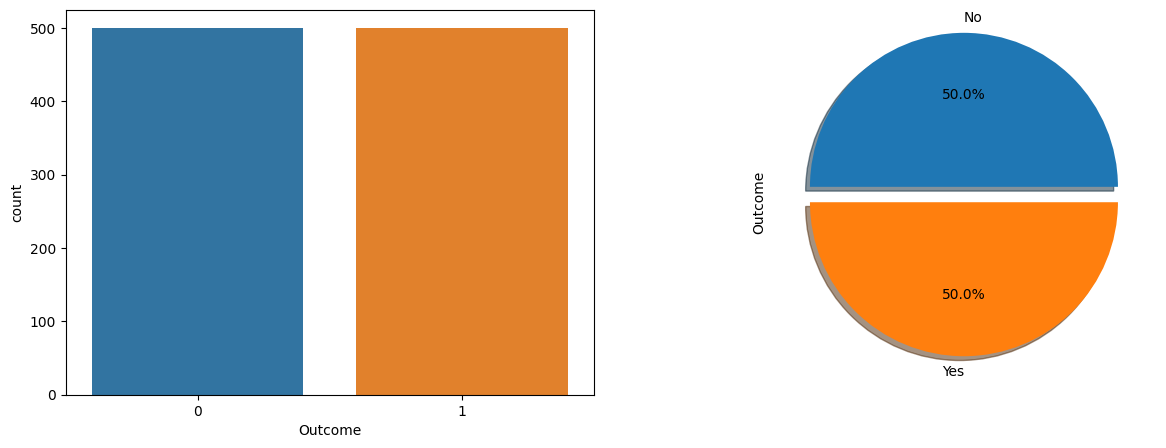

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=df_cp, x=YY, ax=ax[0])
YY.value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])

plt.show()

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(XX,YY,test_size=0.2,stratify=YY,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (800, 8) (200, 8)


# **Training the Model using SVM**

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# **Model Evaluation**

**Accuracy score of testing data**

In [ ]:
from sklearn.metrics import accuracy_score
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print("Accuracy :", test_data_accuracy)

Accuracy : 0.78


**Confusion Matrix for SVM**

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Example true labels and predicted labels (replace these with your actual data)
true_labels = Y_test
predicted_labels = X_test_prediction

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[78 22]
 [22 78]]


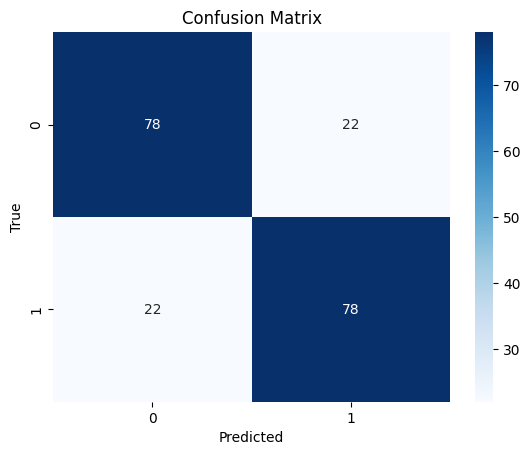

In [ ]:
confusion = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **Training the model using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

# **Model evaluation**

**Accuracy Score of Testing data**

In [ ]:
X_test_prediction2 = rf_classifier.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction2,Y_test)

In [ ]:
print("Accuracy :", test_data_accuracy2)

Accuracy : 0.845


**Confusion Matrix for Random Forest**

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Example true labels and predicted labels (replace these with your actual data)
true_labels = Y_test
predicted_labels = X_test_prediction2

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[79 21]
 [10 90]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

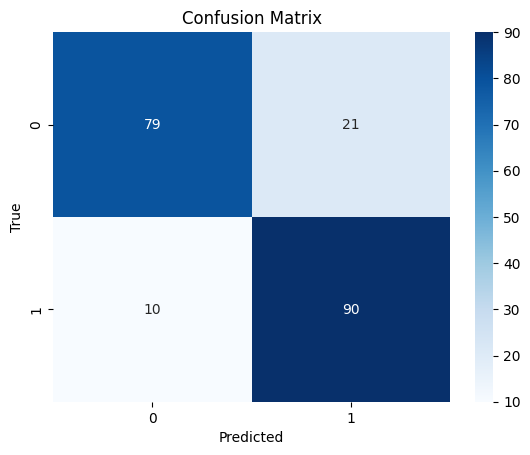

In [ ]:
confusion = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np

# Ask the user to input feature values
pregnancies = int(input("Enter the number of pregnancies: "))
glucose = int(input("Enter the glucose level: "))
blood_pressure = int(input("Enter the blood pressure: "))
skin_thickness = int(input("Enter the skin thickness: "))
insulin = float(input("Enter the insulin level: "))
bmi = float(input("Enter the BMI: "))
dpf = float(input("Enter the Diabetes Pedigree Function: "))
age = int(input("Enter the age: "))

# Create a list with the input feature values
feature_values = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]

# Convert the list to a NumPy array
feature_array = np.array(feature_values)


# You can now use this 'feature_array' for prediction with your model
# Example: model.predict(feature_array)

Enter the number of pregnancies: 10
Enter the glucose level: 115
Enter the blood pressure: 72
Enter the skin thickness: 23
Enter the insulin level: 30.5
Enter the BMI: 35.3
Enter the Diabetes Pedigree Function: 0.134
Enter the age: 29


In [ ]:
f=feature_array.reshape(-1,8)

In [ ]:
new_prediction=rf_classifier.predict(f)
print(new_prediction)
if new_prediction==1:
  print("you have diabetes")
else:
  print("you dont have diabetes")

[1]
you have diabetes


In [ ]:
pip list

In [ ]:
!pip install joblib

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib
from google.colab import files  # Import files module for downloading


# Fit the scaler on your data (if you have data)
# scaler.fit(X)

# Save the scaler to a PKL file
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [ ]:
import pickle
with open('new_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)